In [ ]:

import pandas as pd
df=pd.read_csv("/content/Original_data1.csv")
print(df.head())

       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      Full-time    

In [ ]:
df.shape

(255347, 18)

In [ ]:
df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

In [ ]:
df.EmploymentType.unique()

array(['Full-time', 'Unemployed', 'Self-employed', 'Part-time'],
      dtype=object)

In [ ]:
!python --version

!pip install imbalanced-learn


Python 3.11.13


In [ ]:
df['Default'].value_counts(normalize=True)

,proportion
Default,
0,0.883872
1,0.116128


In [ ]:
X= df.drop(columns=['Default'])
Y= df['Default']


In [ ]:
from imblearn.over_sampling import SMOTE

# Use only numeric features (from your earlier list)
selected_features = [
    'Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
     'InterestRate', 'LoanTerm', 'DTIRatio'
]

X = df[selected_features]
y = df['Default']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(f"✅ After SMOTE: {X_resampled.shape}, Class balance: {y_resampled.value_counts().to_dict()}")


✅ After SMOTE: (451388, 8), Class balance: {0: 225694, 1: 225694}


In [ ]:
# Step 3: Combine resampled features and target variable into a new DataFrame
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df["Default"] = y_resampled

resampled_df.to_csv('Processed_data.csv', index=False)

resampled_df.head()

resampled_df['Default'].value_counts(normalize=True)

,proportion
Default,
0,0.5
1,0.5


In [ ]:
"""# **Feature Reduction**"""

X = resampled_df[['Age', 'Income', 'LoanAmount', 'CreditScore','MonthsEmployed','InterestRate','DTIRatio','LoanTerm']]
Y= resampled_df['Default']

X.shape,Y.shape

((451388, 8), (451388,))

In [ ]:
# Step 3: Combine resampled features and target variable into a new DataFrame
final_df = pd.DataFrame(X, columns=X.columns)
final_df["Default"] = Y

final_df.head()

final_df.shape

final_df.to_csv('Selected_features.csv', index=False)


In [ ]:
df.shape

(255347, 18)

In [ ]:
df.isnull().sum()

,0
LoanID,0
Age,0
Income,0
LoanAmount,0
CreditScore,0
MonthsEmployed,0
NumCreditLines,0
InterestRate,0
LoanTerm,0
DTIRatio,0


In [ ]:
"""# TrainTest Split"""

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7,stratify = Y)

X_train.head()

X_train.isnull().sum()


,0
Age,0
Income,0
LoanAmount,0
CreditScore,0
MonthsEmployed,0
InterestRate,0
DTIRatio,0
LoanTerm,0


In [ ]:
"""# **Getting Feature importance**

# APPLY DECISION TREE
"""

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 7)
dt.fit(X_train,y_train)

# importance of all features
sorted(zip(dt.feature_importances_,X_train.columns),reverse = True)

# 2) mean importance take col > mean import
mean_imp = sum(dt.feature_importances_)/len(dt.feature_importances_)
X_train.columns[dt.feature_importances_ > mean_imp ]

# 3) Select top 5
sorted(zip(dt.feature_importances_,X_train.columns),reverse = True)[:5]

[(np.float64(0.34417827405943013), 'LoanTerm'),
 (np.float64(0.13383252916726077), 'Age'),
 (np.float64(0.12421017444519757), 'InterestRate'),
 (np.float64(0.09982788854927357), 'Income'),
 (np.float64(0.0943410347682023), 'LoanAmount')]

In [ ]:
"""# APPLY RFE"""

from sklearn.feature_selection import RFE

rfe = RFE(dt)
rfe.fit(X_train,y_train)

for imp,col in sorted(zip(rfe.ranking_,X_train.columns)):
    print(f"{col} = {imp}")

#2) important column rank = 1

print("Column Count = ",len(X_train.columns[rfe.ranking_ == 1  ]))
X_train.columns[rfe.ranking_ == 1 ]

Income = 1
InterestRate = 1
LoanAmount = 1
LoanTerm = 1
Age = 2
CreditScore = 3
MonthsEmployed = 4
DTIRatio = 5
Column Count =  4


Index(['Income', 'LoanAmount', 'InterestRate', 'LoanTerm'], dtype='object')

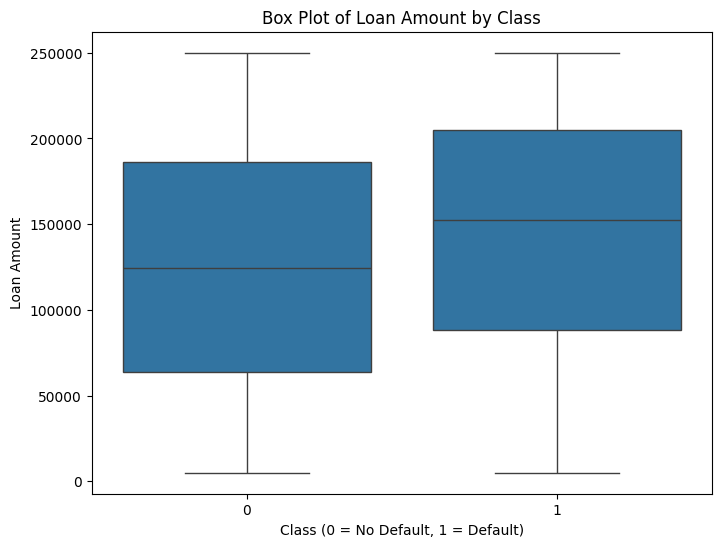

                     Age    Income  LoanAmount  CreditScore  MonthsEmployed  \
Age             1.000000  0.015184   -0.019221     0.011782        0.033018   
Income          0.015184  1.000000   -0.069877     0.000375        0.009705   
LoanAmount     -0.019221 -0.069877    1.000000    -0.001781       -0.007089   
CreditScore     0.011782  0.000375   -0.001781     1.000000        0.010286   
MonthsEmployed  0.033018  0.009705   -0.007089     0.010286        1.000000   
InterestRate   -0.047432 -0.014351    0.009952    -0.008029       -0.022212   
LoanTerm        0.000639 -0.000211   -0.000392     0.001362       -0.001372   
DTIRatio       -0.011840 -0.000454    0.002259     0.001314       -0.003029   
Default        -0.295708 -0.150234    0.135298    -0.060132       -0.169656   

                InterestRate  LoanTerm  DTIRatio   Default  
Age                -0.047432  0.000639 -0.011840 -0.295708  
Income             -0.014351 -0.000211 -0.000454 -0.150234  
LoanAmount          0.0099

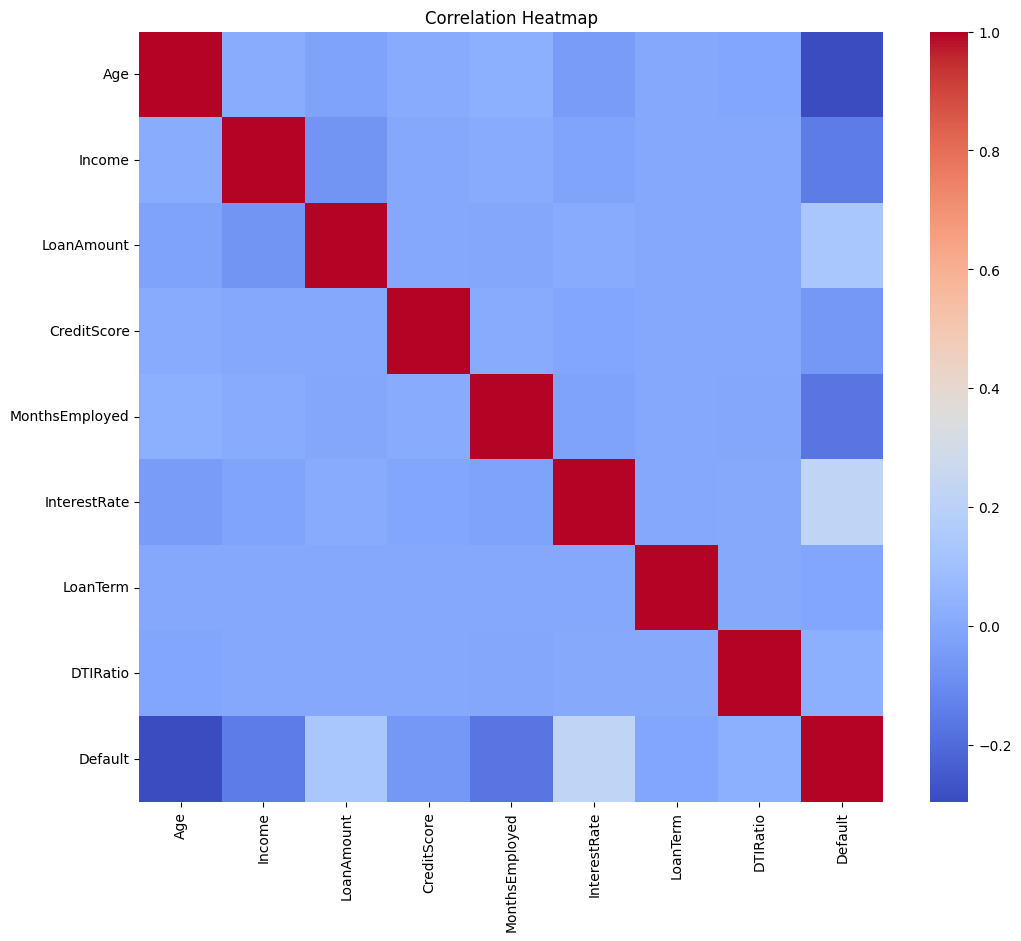

((315971, 8), (135417, 8), (315971,), (135417,))

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# The error was caused because the original `df` still contained
# non-numeric columns. Using the one-hot encoded dataframe `X_encoded`
# which contains only numeric data.
X_for_corr = resampled_df.copy()
# X_for_corr['Default'] = y_resampled # This line is not needed as resampled_df already has the 'Default' column


plt.figure(figsize=(8, 6))
sns.boxplot(x=X_for_corr["Default"], y=X_for_corr["LoanAmount"])
plt.title("Box Plot of Loan Amount by Class")
plt.xlabel("Class (0 = No Default, 1 = Default)")
plt.ylabel("Loan Amount")
plt.show()

"""# Correlation"""

# Compute correlation matrix
correlation_matrix = X_for_corr.corr()

# Print correlation matrix
print(correlation_matrix)

"""# HeatMap"""

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")

# Show the plot
plt.title("Correlation Heatmap")
plt.show()

X = X_resampled
Y= y_resampled

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

In [ ]:
#Entrypoint 2.x
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local").appName("Spark SQL basic example").enableHiveSupport().getOrCreate()

# On yarn:
# spark = SparkSession.builder.appName("Spark SQL basic example").enableHiveSupport().master("yarn").getOrCreate()
# specify .master("yarn")

sc = spark.sparkContext

file_path ="/content/Original_data1.csv"

# Create an DataFrame from file_path
df = spark.read.csv(file_path,header=True,inferSchema=True)

# Check the type of people_df
#print("The type of people_df is", type(people_df))

from pyspark.sql.functions import col
# Get the total count of records
total_count = df.count()

# Get the count of each class (0 and 1)
class_counts = df.groupBy("Default").count()

# Calculate the proportion of each class
class_proportions = class_counts.withColumn("proportion", col("count") / total_count)

# Show the result
class_proportions.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score

# Use balanced class weights to improve recall on minority class
logreg = LogisticRegression(class_weight='balanced', random_state=7, max_iter=1000)

# Fit the model
logreg.fit(X_train, Y_train)

# Predict
y_pred = logreg.predict(X_test)

# Evaluate
accuracy = accuracy_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)


print(f"✅ Accuracy: {accuracy:.4f}")
print(f"🔁 Recall: {recall:.4f}")
print("\n📊 Confusion Matrix:")





✅ Accuracy: 0.6880
🔁 Recall: 0.7040

📊 Confusion Matrix:
[[45602 22260]
 [19994 47561]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', random_state=7, n_jobs=-1)
rf.fit(X_train, Y_train)

y_pred_rf = rf.predict(X_test)

print("🌲 Random Forest")
print(f"✅ Accuracy: {accuracy_score(Y_test, y_pred_rf):.4f}")
print(f"🔁 Recall: {recall_score(Y_test, y_pred_rf):.4f}")
print(confusion_matrix(Y_test, y_pred_rf))
print(classification_report(Y_test, y_pred_rf))


🌲 Random Forest
✅ Accuracy: 0.8786
🔁 Recall: 0.8514
[[61466  6396]
 [10038 57517]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88     67862
           1       0.90      0.85      0.87     67555

    accuracy                           0.88    135417
   macro avg       0.88      0.88      0.88    135417
weighted avg       0.88      0.88      0.88    135417



In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(scale_pos_weight=Y_train.value_counts()[0] / Y_train.value_counts()[1],
                    use_label_encoder=False, eval_metric='logloss', random_state=7)
xgb.fit(X_train, Y_train)

y_pred_xgb = xgb.predict(X_test)

print("\n⚡ XGBoost")
print(f"✅ Accuracy: {accuracy_score(Y_test, y_pred_xgb):.4f}")
print(f"🔁 Recall: {recall_score(Y_test, y_pred_xgb):.4f}")
print(confusion_matrix(Y_test, y_pred_xgb))
print(classification_report(Y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:47:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



⚡ XGBoost
✅ Accuracy: 0.8891
🔁 Recall: 0.8150
[[65338  2524]
 [12498 55057]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90     67862
           1       0.96      0.81      0.88     67555

    accuracy                           0.89    135417
   macro avg       0.90      0.89      0.89    135417
weighted avg       0.90      0.89      0.89    135417



In [ ]:
# Install CatBoost (only needed in notebooks)
%pip install catboost

# Import CatBoostClassifier
from catboost import CatBoostClassifier

#Only keep required features
selected_features = [
    'Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
     'InterestRate', 'LoanTerm', 'DTIRatio'
]

X = df[selected_features]
y = df['Default']

# ✅ Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# ✅ Train CatBoost with selected features
cat = CatBoostClassifier(auto_class_weights='Balanced', verbose=0, random_state=7)
cat.fit(X_train, Y_train)

# ✅ Predict
y_pred_cat = cat.predict(X_test)

# ✅ Evaluation
print("\n🐱 CatBoost")
print(f"✅ Accuracy: {accuracy_score(Y_test, y_pred_cat):.4f}")
print(f"🔁 Recall: {recall_score(Y_test, y_pred_cat):.4f}")
print(confusion_matrix(Y_test, y_pred_cat))
print(classification_report(Y_test, y_pred_cat))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.6 MB/s eta 0:00:00

🐱 CatBoost
✅ Accuracy: 0.7060
🔁 Recall: 0.6287
[[32382 12847]
 [ 2169  3672]]
              precision    recall  f1-score   support

           0       0.94      0.72      0.81     45229
           1       0.22      0.63      0.33      5841

    accuracy                           0.71     51070
   macro avg       0.58      0.67      0.57     51070
weighted avg       0.86      0.71      0.76     51070



In [ ]:
import joblib

# Save the best model
joblib.dump(xgb, "best_XGBoost_model.pkl")
print("✅ xgb model saved as best_XGBoost_model.pkl")


✅ xgb model saved as best_XGBoost_model.pkl


In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier


# Get predicted class and probability
y_pred = xgb.predict(X_test)
y_proba = xgb.predict_proba(X_test)[:, 1]  # Probability of class 1

# Combine with feature input
output_df = pd.DataFrame(X_test, columns=X_train.columns)

# Add prediction and probability to DataFrame
output_df["Prediction"] = y_pred
output_df["Probability"] = y_proba

# Save to CSV
output_df.to_csv("xgboost_predictions_for_tableau.csv", index=False)

print("✅ Predictions exported to 'xgboost_predictions_for_tableau.csv'")


✅ Predictions exported to 'xgboost_predictions_for_tableau.csv'


In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Set Streamlit page configuration
st.set_page_config(page_title="Loan Risk Predictor", page_icon="🏦")

# Load trained XGBoost model
model = joblib.load("best_xgboost_model.pkl")  # Replace with your actual model path

# App title
st.title("🏦 Loan Default Risk Predictor")
st.markdown("Use this tool to assess the risk of default before approving a loan.")

# Input form
st.markdown("### 📋 Enter Applicant Details")

age = st.slider("Age", 18, 75, 30)
income = st.number_input("Monthly Income (₹)", min_value=0, value=30000)
loan_amount = st.number_input("Loan Amount (₹)", min_value=1000, value=100000)
credit_score = st.slider("Credit Score", 300, 850, 650)
months_employed = st.slider("Months Employed", 0, 600, 36)
interest_rate = st.slider("Interest Rate (%)", 0.0, 30.0, 12.0)
loan_term = st.selectbox("Loan Term (months)", [12, 24, 36, 48, 60])
dti_ratio = st.slider("DTI Ratio (%)", 0.0, 100.0, 35.0)

# Prediction trigger
if st.button("Check Loan Risk"):
    # Create input DataFrame
    input_data = pd.DataFrame([{
        'Age': age,
        'Income': income,
        'LoanAmount': loan_amount,
        'CreditScore': credit_score,
        'MonthsEmployed': months_employed,
        'InterestRate': interest_rate,
        'LoanTerm': loan_term,
        'DTIRatio': dti_ratio
    }])

    # Get prediction probability
    prob = model.predict_proba(input_data)[0][1]

    # Custom threshold
    threshold = 0.35
    prediction = 1 if prob >= threshold else 0

    # Result output
    st.markdown("### 🔍 Prediction Result")
    if prediction == 1:
        st.error(f"🚫 **Risky**: {prob:.2%} chance of default. Loan should be avoided.")
    else:
        st.success(f"✅ **Safe**: Only {prob:.2%} chance of default. Loan may be granted.")

    # Model output
    st.markdown("### 📊 Model Output")
    st.write(f"Prediction Class (threshold @ {threshold:.2f}): `{prediction}` (1 = Risky, 0 = Safe)")
    st.write(f"Probability of Default: `{prob:.4f}`")


ModuleNotFoundError: No module named 'streamlit'